# External Lab 

Here each question is of 1 mark.

# Multiple Linear Regression

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [247]:
import pandas as pd
import numpy as np


df= pd.read_csv('petrol.csv')
df.head(5)

,tax,income,highway,dl,consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [248]:
df.describe()

,tax,income,highway,dl,consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [249]:
# Cross verifying incase if there are any NULLs in dataset 
df.isnull().any()

tax             False
 income         False
 highway        False
 dl             False
 consumption    False
dtype: bool

# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

In [250]:
Q1= df.quantile(0.25)
Q3= df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

tax                1.1250
 income          839.7500
 highway        4045.7500
 dl                0.0655
 consumption     123.2500
dtype: float64


In [251]:

# True indicates that the values were out of range as per definition. 
print((df<(Q1- 1.5 * IQR)) | (df>(Q3+ 1.5 * IQR))) 
#print(df>(Q3+ 1.5 * IQR))

      tax   income   highway     dl   consumption
0   False    False     False  False         False
1   False    False     False  False         False
2   False    False     False  False         False
3   False    False     False  False         False
4   False    False     False  False         False
5    True    False     False  False         False
6   False    False     False  False         False
7   False    False     False  False         False
8   False    False     False  False         False
9   False    False     False  False         False
10  False    False     False  False         False
11  False    False      True  False         False
12  False    False     False  False         False
13  False    False     False  False         False
14  False    False     False  False         False
15  False    False     False  False         False
16  False    False     False  False         False
17  False    False     False  False         False
18  False    False     False   True          True


In [252]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.head(10)

,tax,income,highway,dl,consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410
6,8.0,5319,11868,0.451,344
7,8.0,5126,2138,0.553,467
8,8.0,4447,8577,0.529,464
9,7.0,4512,8507,0.552,498
10,8.0,4391,5939,0.530,580


# Question 3 - Independent variables and collinearity 
Which attributes seems to have stronger association with the dependent variable consumption?

In [254]:
corr=df_out.corr()
print(corr)

                   tax    income   highway        dl   consumption
tax           1.000000 -0.109537 -0.390602 -0.314702     -0.446116
 income      -0.109537  1.000000  0.051169  0.150689     -0.347326
 highway     -0.390602  0.051169  1.000000 -0.016193      0.034309
 dl          -0.314702  0.150689 -0.016193  1.000000      0.611788
 consumption -0.446116 -0.347326  0.034309  0.611788      1.000000


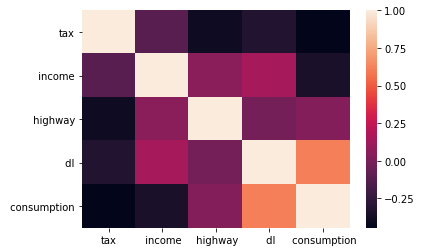

In [255]:
import seaborn as sns
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

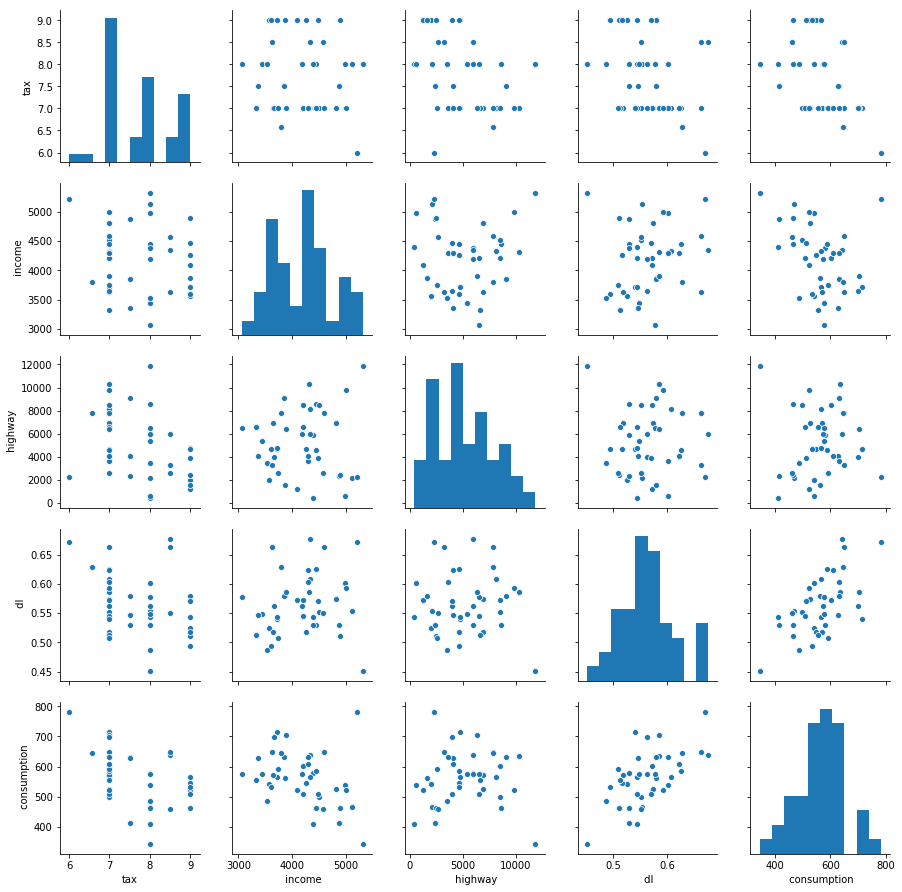

In [256]:
sns.pairplot(df_out)

### Observing the above correlation values between all the variables, we can see that there is stronger association between the number of drivers and consumption. And comparatively tax has an association in a negative way. 
Insights :
As tax increases the consumption decreases.
As number of drivers is more consumption is more

# Question 4 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [321]:
#X=df_out.loc[:,['tax', 'income', 'highway', 'dl']]
#X=pd.DataFrame(df_out.iloc[:,[0,3]])
#Y=pd.DataFrame(df_out.iloc[:,[4]])
#X.head(10)
X = pd.DataFrame(df_out[['tax',' dl']])
Y = pd.DataFrame(df_out[' consumption'])
X,Y



(     tax     dl
 0   9.00  0.525
 1   9.00  0.572
 2   9.00  0.580
 3   7.50  0.529
 4   8.00  0.544
 6   8.00  0.451
 7   8.00  0.553
 8   8.00  0.529
 9   7.00  0.552
 10  8.00  0.530
 12  7.00  0.574
 13  7.00  0.545
 14  7.00  0.608
 15  7.00  0.586
 16  7.00  0.572
 17  7.00  0.540
 19  8.50  0.677
 20  7.00  0.663
 21  8.00  0.602
 22  9.00  0.511
 23  9.00  0.517
 24  8.50  0.551
 25  9.00  0.544
 26  8.00  0.548
 27  7.50  0.579
 28  8.00  0.563
 29  9.00  0.493
 30  7.00  0.518
 31  7.00  0.513
 32  8.00  0.578
 33  7.50  0.547
 34  8.00  0.487
 35  6.58  0.629
 37  7.00  0.586
 38  8.50  0.663
 40  7.00  0.626
 41  7.00  0.563
 42  7.00  0.603
 43  7.00  0.508
 44  6.00  0.672
 45  9.00  0.571
 46  7.00  0.623
 47  7.00  0.593,      consumption
 0            541
 1            524
 2            561
 3            414
 4            410
 6            344
 7            467
 8            464
 9            498
 10           580
 12           525
 13           508
 14           566


# Question 5 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [322]:
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics



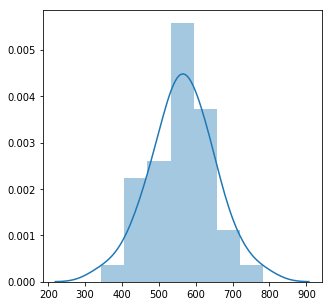

In [323]:
plt.figure(figsize=(5,5))
plt.tight_layout()
sns.distplot(Y)

In [324]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Question 6 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [334]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
regressor.coef_

array([[-25.72238859, 920.92942995]])

In [335]:

Coeff_df = pd.DataFrame(regressor.coef_,columns=X.columns.array)
Coeff_df

,tax,dl
0,-25.722389,920.92943


# R-Square 

# Question 7 - Evaluate the model 
Calculate the accuracy score for the above model.

In [368]:
y_pred = pd.DataFrame(regressor.predict(X_test),index=X_test.index,columns=y_test.columns)

In [369]:
y_pred

,consumption
33,552.273735
41,579.869800
30,538.427976
4,536.649753
12,590.000024
28,554.147412
31,533.823329
13,563.293071
42,616.706977


In [372]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
rmse

70.98121416555125

In [395]:
#df_test_pred=y_test
#y_test.index
#y_pred.index
df_test_pred=df_test_pred.join(y_pred,on=y_pred.index,rsuffix=' predicted')




In [396]:
df_test_pred


,consumption,consumption predicted
33,628,552.273735
41,699,579.869800
30,571,538.427976
4,410,536.649753
12,525,590.000024
28,574,554.147412
31,554,533.823329
13,508,563.293071
42,632,616.706977


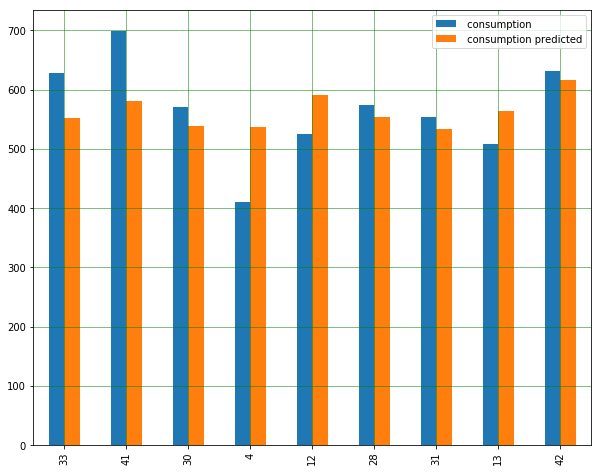

In [397]:
df_test_pred.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Question 8: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


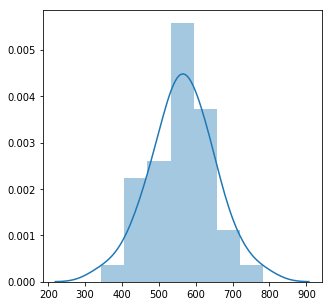

In [398]:
X=df_out.iloc[:,[0,1,2,3]]
Y=df_out.iloc[:,[4]]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
plt.figure(figsize=(5,5))
plt.tight_layout()
sns.distplot(Y)

In [399]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [400]:
eff_df = pd.DataFrame(regressor.coef_,columns=X.columns.array)
eff_df

,tax,income,highway,dl
0,-41.264489,-0.069619,-0.003753,880.072361


In [401]:
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
rmse

70.98121416555125

# Question 9: Print the coefficients of the multilinear regression model

In [402]:
regressor.coef_

array([[-4.12644887e+01, -6.96187392e-02, -3.75300044e-03,
         8.80072361e+02]])

In [404]:
pd.DataFrame(regressor.coef_,columns=X.columns.array)

,tax,income,highway,dl
0,-41.264489,-0.069619,-0.003753,880.072361


In [280]:
regressor.intercept_

array([701.20365439])

# Question 10 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

### In my scenario and based on my samples, I have got RMS values almost same in both the cases. 
### Hence the model doesnt get effected with the presence of independent variables